# Given sets of genes related to elemtents of central metabolism, view their log normalized TPM counts across experimental conditions

In [1]:
from Bio import SeqIO

import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from override import GENE_NAME_OVERRIDE, GENE_PRODUCT_OVERRIDE
import utils as u

In [2]:
# get feature info from genbank

def get_override_gene(locus_tag,cur_gene):
    '''
    Given a locus tag, return an overridden gene
    '''
    return GENE_NAME_OVERRIDE[locus_tag] if locus_tag in GENE_NAME_OVERRIDE else cur_gene

def get_override_product(locus_tag,cur_prod):
    '''
    Given a locus tag, return an overridden gene
    '''
    return GENE_PRODUCT_OVERRIDE[locus_tag] if locus_tag in GENE_PRODUCT_OVERRIDE else cur_prod

def get_feat2meta_dict(genbank_path):
    '''
    Given a genbank file, parse it and return a dictionary of locus and the 
    gene, product and type fields
    '''
    seq_record = SeqIO.parse(genbank_path, "genbank").__next__()
    feat_list = []
    # Loop over the genome file, get the features on each of the strands
    for feature in seq_record.features:
        if feature.type != 'gene': # exclude 'gene' wrapper type
            if 'locus_tag' in feature.qualifiers: # exclude features without a locus tag
                # get  locus tag, feature name and product
                lt = feature.qualifiers['locus_tag'][0]
                g = "" if 'gene' not in feature.qualifiers else feature.qualifiers['gene'][0]
                prod = "" if 'product' not in feature.qualifiers else feature.qualifiers['product'][0]
                t = feature.type
                strand = feature.strand

                # overrides
                g = get_override_gene(lt,g)
                prod = get_override_product(lt,prod)

                metadata = {
                    'gene_symbol':g,
                    'product':prod,
                    'type':t,
                    'strand':strand
                }

                feat_list.append((lt,metadata))

    return dict(feat_list)

In [3]:
gb_file = "data/5GB1c_sequence_20220411.gb"
loc2info = get_feat2meta_dict(gb_file)

loc2info['EQU24_RS19315']

{'gene_symbol': 'pmoC',
 'product': 'methane monooxygenase/ammonia monooxygenase subunit C',
 'type': 'CDS',
 'strand': -1}

In [4]:
cm_df = pd.read_csv("data/5g_cmetab_genes_mary_reformat.txt",sep='\t').fillna("")
cm_df.head()

,cmetab,gene_note,locus_tag,check
0,CH4_Ox,pmoC,EQU24_RS19315,
1,CH4_Ox,pmoA,EQU24_RS19310,
2,CH4_Ox,pmoB,EQU24_RS19305,
3,CH4_Ox,sMMO,EQU24_RS05885,
4,CH4_Ox,sMMO,EQU24_RS05890,


In [5]:
loc2gene_note = dict(cm_df[['locus_tag','gene_note']].values)
loc2gene_note

{'EQU24_RS19315': 'pmoC',
 'EQU24_RS19310': 'pmoA',
 'EQU24_RS19305': 'pmoB',
 'EQU24_RS05885': 'sMMO',
 'EQU24_RS05890': 'sMMO',
 'EQU24_RS05895': 'sMMO',
 'EQU24_RS05900': 'sMMO',
 'EQU24_RS05905': 'sMMO',
 'EQU24_RS05910': 'sMMO',
 'EQU24_RS05915': 'sMMO',
 'EQU24_RS05920': 'sMMO',
 'EQU24_RS05925': 'sMMO',
 'EQU24_RS18155': 'mxa',
 'EQU24_RS18145': 'mxa',
 'EQU24_RS18150': 'mxa',
 'EQU24_RS18160': 'mxa',
 'EQU24_RS18165': 'mxa',
 'EQU24_RS18170': 'mxa',
 'EQU24_RS18175': 'mxa',
 'EQU24_RS18180': 'mxa',
 'EQU24_RS18185': 'mxa',
 'EQU24_RS18090': 'mxa',
 'EQU24_RS18605': 'xoxF',
 'EQU24_RS18610': 'xoxJ',
 'EQU24_RS02945': 'PQQ syn',
 'EQU24_RS02950': 'PQQ syn',
 'EQU24_RS02955': 'PQQ syn',
 'EQU24_RS02960': 'PQQ syn',
 'EQU24_RS02965': 'PQQ syn',
 'EQU24_RS02970': 'PQQ syn',
 'EQU24_RS04570': 'mtdA',
 'EQU24_RS06155': 'mtdB',
 'EQU24_RS06160': 'mtdB',
 'EQU24_RS08945': 'fhcC',
 'EQU24_RS08950': 'fhcD',
 'EQU24_RS09125': 'mch',
 'EQU24_RS09135': 'mptG',
 'EQU24_RS09110': 'fae',
 'EQU2

In [6]:
check_df = cm_df[cm_df['check']=='check']
check_df

,cmetab,gene_note,locus_tag,check
74,Glycolysis,trioseP isomerase,EQU24_RS09515,check
88,TCA_cycle,aKG DH,EQU24_RS08320,check
89,TCA_cycle,fum hydratase,EQU24_RS08335,check
100,TCA_cycle,succ DH,EQU24_RS06965,check
109,C3_C4_conv,pyr carbox,EQU24_RS05845,check
110,C3_C4_conv,pyr carbox,EQU24_RS05850,check
116,Serine_cycle,hpr,EQU24_RS04580,check
117,Serine_cycle,glyA,EQU24_RS04560,check
118,Serine_cycle,gck,EQU24_RS04565,check
119,Serine_cycle,mdh,EQU24_RS04575,check


In [7]:
for g in check_df['locus_tag'].values:
    print(g,loc2info[g])

EQU24_RS09515 {'gene_symbol': 'tpiA', 'product': 'triose-phosphate isomerase', 'type': 'CDS', 'strand': 1}
EQU24_RS08320 {'gene_symbol': '', 'product': '2OG-Fe(II) oxygenase', 'type': 'CDS', 'strand': -1}
EQU24_RS08335 {'gene_symbol': '', 'product': 'fumarate hydratase', 'type': 'CDS', 'strand': 1}
EQU24_RS06965 {'gene_symbol': 'sdhC', 'product': 'succinate dehydrogenase, cytochrome b556 subunit', 'type': 'CDS', 'strand': 1}
EQU24_RS05845 {'gene_symbol': 'oadA', 'product': 'sodium-extruding oxaloacetate decarboxylase subunit alpha', 'type': 'CDS', 'strand': -1}
EQU24_RS05850 {'gene_symbol': '', 'product': 'acetyl-CoA carboxylase biotin carboxylase subunit', 'type': 'CDS', 'strand': -1}
EQU24_RS04580 {'gene_symbol': '', 'product': 'D-glycerate dehydrogenase', 'type': 'CDS', 'strand': -1}
EQU24_RS04560 {'gene_symbol': '', 'product': 'serine hydroxymethyltransferase', 'type': 'CDS', 'strand': -1}
EQU24_RS04565 {'gene_symbol': '', 'product': 'glycerate kinase', 'type': 'CDS', 'strand': -1}

Are these right?
* aKG DH: EQU24_RS08320: 2OG-Fe(II) oxygenase
* hpr : EQU24_RS04580 : D-glycerate dehydrogenase
* glyA: EQU24_RS04560 : serine hydroxymethyltransferase


In [8]:
no_info_genes = [x for x in cm_df['locus_tag'].values if x not in loc2info]
no_info_genes

['EQU24_RS14120']

EQU24_RS06967 is EQU24_RS06965
EQU24_RS14120 was removed from new genbank? was psuedo in old genbank

In [9]:
# not in tpm df?
#tpm_file = 'data/extract_TPM_counts.tsv'
tpm_file = 'data/5GB1_tpms_20221031.tsv'
og_tpm_df = pd.read_csv(tpm_file,sep='\t').fillna("")
og_tpm_df.head()

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,gene_len,5GB1_ferm_Ack_QC_tpm,...,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm,5GB1C_CH4_500ppm-Rep1_tpm,5GB1C_CH4_500ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep1_tpm
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,NZ_CP035467.1,0,1317,Derived by automated computational analysis us...,1318,2.920380,...,38.638102,31.867873,30.546267,36.840627,29.198516,35.405768,56.747208,55.734395,46.812595,35.325741
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,dnaN,NZ_CP035467.1,1502,2603,Derived by automated computational analysis us...,1102,1.600865,...,45.092244,45.889651,34.824076,44.661748,35.864388,45.409001,32.721559,33.467532,34.906928,30.020538
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,NZ_CP035467.1,3060,4140,Derived by automated computational analysis us...,1081,1.409423,...,21.362765,20.976809,17.355043,21.854708,18.734014,25.608242,26.409599,23.529439,21.368579,16.896055
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,NZ_CP035467.1,4185,6600,Derived by automated computational analysis us...,2416,3.186309,...,57.478160,61.623220,52.941842,63.050677,55.592843,58.631387,48.167231,51.249206,61.811500,54.226180
4,EQU24_RS00035,hypothetical protein,CDS,,NZ_CP035467.1,7350,7734,Derived by automated computational analysis us...,385,8.852007,...,118.910610,106.287739,102.200487,116.972791,105.924563,129.975893,86.942252,83.059104,118.967455,94.451247


In [10]:
not_in_tpms = [x for x in cm_df['locus_tag'].values if x not in og_tpm_df['locus_tag'].values]
not_in_tpms

['EQU24_RS14120']

In [11]:
# since we don't have TPM counts for these ids, filter out for now
cm_df = cm_df[~cm_df['locus_tag'].isin(not_in_tpms)]
cm_df

,cmetab,gene_note,locus_tag,check
0,CH4_Ox,pmoC,EQU24_RS19315,
1,CH4_Ox,pmoA,EQU24_RS19310,
2,CH4_Ox,pmoB,EQU24_RS19305,
3,CH4_Ox,sMMO,EQU24_RS05885,
4,CH4_Ox,sMMO,EQU24_RS05890,
...,...,...,...,...
140,ETS,Cytc oxidase,EQU24_RS08255,
141,ETS,Cytc oxidase,EQU24_RS08260,
142,ETS,Cyt b(o/a)3 type ox,EQU24_RS09070,
143,ETS,Cyt b(o/a)3 type ox,EQU24_RS09075,


In [12]:
cm_df['gene_symbol'] = cm_df['locus_tag'].apply(lambda x: loc2info[x]['gene_symbol'])
cm_df['product'] = cm_df['locus_tag'].apply(lambda x: loc2info[x]['product'])

In [13]:
cm_df.head()

,cmetab,gene_note,locus_tag,check,gene_symbol,product
0,CH4_Ox,pmoC,EQU24_RS19315,,pmoC,methane monooxygenase/ammonia monooxygenase su...
1,CH4_Ox,pmoA,EQU24_RS19310,,pmoA,methane monooxygenase/ammonia monooxygenase su...
2,CH4_Ox,pmoB,EQU24_RS19305,,pmoB,methane monooxygenase/ammonia monooxygenase su...
3,CH4_Ox,sMMO,EQU24_RS05885,,mmoX,aromatic/alkene/methane monooxygenase hydroxyl...
4,CH4_Ox,sMMO,EQU24_RS05890,,mmoY,aromatic/alkene monooxygenase hydroxylase subu...


# prepare TPM df 
1. remove low expression genes
1. log normalize to average of uMax

In [14]:
# mapping of samples to conditions
sample2cond_file = 'data/sample2condition.txt'
with open(sample2cond_file,'r') as f:
    sample2cond = dict(x.strip().split() for x in f.readlines())
    
# just the conditions we want to include
cond_file = "data/conditions_to_include_20221031.txt"
with open(cond_file,'r') as f:
    conds = [x.strip() for x in f.readlines()]
    
# samples from only the conditions to include
samples = [x for x in sample2cond.keys() if sample2cond[x] in conds]

In [15]:
# check to exclude some samples from metadata df
meta_df = pd.read_csv('data/5G_exp_metadata.tsv',sep='\t')
meta_df.head()

,exp_theme,exp_condition,#sample,shortd,longd,mutation_locus,bior,techr,path_to_FASTQ,path_to_FASTQ_paired_end,...,secondary_altered_parameters,OD,Dilution rate (per day),Abnormal medium? (NMS2 unless indicated otherwise),O2-stressed,N-stressed,Fe-stressed,Cu-stressed,EPS,marker_for
0,lowO2_slow_growth,lowO2_slow_growth,5GB1_ferm_Ack_QC,ferm_Ack_QC,Melissa needs to provide details (acetate kinase),MBURv2_60338,1.0,1,/work/5GB1c_rnaseq/data/fastq/5GB1_ferm_Ack_QC...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,lowO2_slow_growth,lowO2_slow_growth,5GB1_ferm_WT_QC,ferm_WT_QC,Melissa needs to provide details,NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/5GB1_ferm_WT_QC....,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,NaN,1.5,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,uMax,uMax,5GB1_FM03_TR2_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",NaN,1.0,2,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,NaN,1.5,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR1_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,NaN,2.4,4.3,NaN,low,NaN,NaN,NaN,NaN,NaN


In [16]:
samples_to_exclude = [x+"_tpm" for x in meta_df[meta_df['include?']==0]['#sample'].values]
samples_to_exclude

['5GB1_FM18_TR1_QC_tpm',
 '5GB1_FM19_TR1_tpm',
 '5GB1_FM22_TR3_tpm',
 '5GB1_FM40_T20m_TR2_QC_tpm',
 'br1_QC_tpm',
 'br2_QC_tpm',
 'ribo0_tpm',
 'total_tpm']

In [17]:
for s in samples_to_exclude:
    if s in samples:
        samples.remove(s)

In [18]:
'5GB1_FM40_T20m_TR2_QC_tpm' in samples

False

In [19]:
### Get tpm df to only those with samples
tpm_df = og_tpm_df[['locus_tag']+samples]
tpm_df.head()

,locus_tag,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,5GB1_FM14_TR1_tpm,...,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm,5GB1C_CH4_500ppm-Rep1_tpm,5GB1C_CH4_500ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep1_tpm,5GB1C_CH4_1000ppm-Rep2_tpm
0,EQU24_RS00005,28.358614,44.473805,20.777639,30.365022,27.423217,27.580742,27.497671,28.473154,36.082793,...,38.638102,31.867873,30.546267,36.840627,29.198516,35.405768,56.747208,55.734395,35.325741,46.812595
1,EQU24_RS00010,29.780875,46.816867,30.027334,34.856148,26.517829,27.761764,25.585504,25.912266,42.812676,...,45.092244,45.889651,34.824076,44.661748,35.864388,45.409001,32.721559,33.467532,30.020538,34.906928
2,EQU24_RS00015,19.677397,25.543682,17.521963,24.230312,16.044550,15.081073,16.017418,16.383477,21.734872,...,21.362765,20.976809,17.355043,21.854708,18.734014,25.608242,26.409599,23.529439,16.896055,21.368579
3,EQU24_RS00020,37.481298,61.957785,42.788951,48.332319,35.626418,35.275104,36.219912,34.618143,47.795135,...,57.478160,61.623220,52.941842,63.050677,55.592843,58.631387,48.167231,51.249206,54.226180,61.811500
4,EQU24_RS00035,29.203593,60.711494,47.419790,55.301121,73.284858,74.598429,83.348331,85.720668,77.735880,...,118.910610,106.287739,102.200487,116.972791,105.924563,129.975893,86.942252,83.059104,94.451247,118.967455


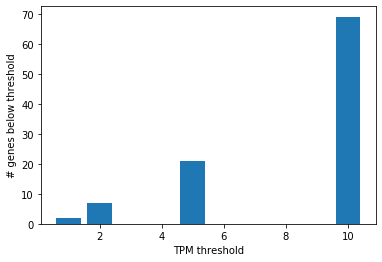

In [20]:
no_tx_genes1 = []
no_tx_genes2 = []
no_tx_genes5 = []
no_tx_genes10 = []
for i, row, in tpm_df.iterrows():
    tpms = row[samples].values
    if max(tpms) < 1.0:
        no_tx_genes1.append(row['locus_tag'])
    if max(tpms) < 2.0:
        no_tx_genes2.append(row['locus_tag'])
    if max(tpms) < 5.0:
        no_tx_genes5.append(row['locus_tag'])
    if max(tpms) < 10.0:
        no_tx_genes10.append(row['locus_tag'])

plt.bar([1,2,5,10],[len(no_tx_genes1),len(no_tx_genes2),len(no_tx_genes5),len(no_tx_genes10)])
plt.xlabel("TPM threshold")
plt.ylabel("# genes below threshold")
plt.show()

In [21]:
og_tpm_df[og_tpm_df['locus_tag'].isin(no_tx_genes2)]

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,gene_len,5GB1_ferm_Ack_QC_tpm,...,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm,5GB1C_CH4_500ppm-Rep1_tpm,5GB1C_CH4_500ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep1_tpm
1177,EQU24_RS06390,IS66 family transposase,CDS,,NZ_CP035467.1,1400425,1402006,Derived by automated computational analysis us...,1582,0.0,...,1.282277,1.408905,0.810236,1.170442,1.479905,1.255985,0.478344,0.574617,0.524691,0.410511
1373,EQU24_RS07485,IS66 family transposase,CDS,,NZ_CP035467.1,1650361,1651942,Derived by automated computational analysis us...,1582,0.0,...,0.574460,0.337462,0.491052,0.606122,0.684456,0.817000,1.182754,1.364362,1.284959,1.285194
1652,EQU24_RS09050,IS66 family transposase,CDS,,NZ_CP035467.1,2000632,2002213,Derived by automated computational analysis us...,1582,0.0,...,1.446408,1.290793,0.589263,1.086839,1.193174,0.792612,0.874779,0.902970,1.115772,0.823705
3135,EQU24_RS17185,IS66 family transposase,CDS,,NZ_CP035467.1,3856997,3858578,Derived by automated computational analysis us...,1582,0.0,...,0.779624,0.894275,0.613815,0.731526,1.137677,0.829194,1.556255,1.443619,1.441295,1.070548
3588,EQU24_RS19655,IS66 family transposase,CDS,,NZ_CP035467.1,4416746,4418327,Derived by automated computational analysis us...,1582,0.0,...,0.574460,0.632742,0.343737,0.710626,0.702955,0.609701,0.648713,0.438747,0.434744,0.327335
4160,EQU24_RS23000,hypothetical protein,CDS,,NZ_CP035467.1,2663997,2664351,Derived by automated computational analysis us...,355,0.0,...,0.868567,0.375962,0.492366,0.698556,0.824370,1.249836,0.423412,0.428884,0.467640,0.227177
4161,EQU24_RS23005,hypothetical protein,CDS,,NZ_CP035467.1,2664307,2664784,Derived by automated computational analysis us...,478,0.0,...,0.271607,0.055844,0.040630,0.103760,0.030612,0.080715,0.346989,0.543362,0.404009,0.293039


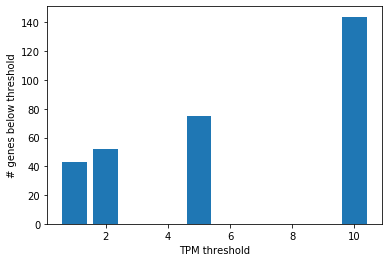

In [16]:
# Previous plot for original df

# no_tx_genes1 = []
# no_tx_genes2 = []
# no_tx_genes5 = []
# no_tx_genes10 = []
# for i, row, in tpm_df.iterrows():
#     tpms = row[samples].values
#     if max(tpms) < 1.0:
#         no_tx_genes1.append(row['locus_tag'])
#     if max(tpms) < 2.0:
#         no_tx_genes2.append(row['locus_tag'])
#     if max(tpms) < 5.0:
#         no_tx_genes5.append(row['locus_tag'])
#     if max(tpms) < 10.0:
#         no_tx_genes10.append(row['locus_tag'])

# plt.bar([1,2,5,10],[len(no_tx_genes1),len(no_tx_genes2),len(no_tx_genes5),len(no_tx_genes10)])
# plt.xlabel("TPM threshold")
# plt.ylabel("# genes below threshold")
# plt.show()

In [22]:
# set all genes with <2 TPM in all conditions to 0.
# this will help ensure that small relative changes of TPM values don't create giant log ratio values
adj_tpm_df = tpm_df.__deepcopy__()

for i, row in adj_tpm_df.iterrows():
    if row['locus_tag'] in no_tx_genes2:
        for s in samples:
            adj_tpm_df.loc[i,s] = 0.0

adj_tpm_df[adj_tpm_df['locus_tag'].isin(no_tx_genes2)][['locus_tag']+samples]

,locus_tag,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,5GB1_FM14_TR1_tpm,...,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm,5GB1C_CH4_500ppm-Rep1_tpm,5GB1C_CH4_500ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep1_tpm,5GB1C_CH4_1000ppm-Rep2_tpm
1177,EQU24_RS06390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1373,EQU24_RS07485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1652,EQU24_RS09050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3135,EQU24_RS17185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3588,EQU24_RS19655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4160,EQU24_RS23000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4161,EQU24_RS23005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### take log of the tpm_df

In [23]:
# log 2 of the tpms with psuedocount
log_tpm_df = np.log2(adj_tpm_df[samples] + 0.01)

# meta data columns (not samples)
meta_df = adj_tpm_df[adj_tpm_df.columns[~adj_tpm_df.columns.isin(samples)]]

# smush meta and logged vals back together
log_tpm_df = pd.concat([meta_df, log_tpm_df],axis=1)
log_tpm_df.head()

,locus_tag,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,5GB1_FM14_TR1_tpm,...,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm,5GB1C_CH4_500ppm-Rep1_tpm,5GB1C_CH4_500ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep1_tpm,5GB1C_CH4_1000ppm-Rep2_tpm
0,EQU24_RS00005,4.826224,5.475208,4.377654,4.924814,4.777852,4.786112,4.781762,4.832037,5.173639,...,5.272326,4.994483,4.933396,5.203617,4.868317,5.146320,5.826732,5.800755,5.143056,5.549133
1,EQU24_RS00010,4.896799,5.549265,4.908685,5.123755,4.729435,4.795547,4.677818,4.696120,5.420303,...,5.495127,5.520411,5.122427,5.481291,5.164882,5.505224,5.032610,5.065121,4.908358,5.125855
2,EQU24_RS00015,4.299200,4.675459,4.131916,4.599336,4.004910,3.915623,4.002470,4.035050,4.442603,...,4.417702,4.391411,4.118114,4.450532,4.228358,4.679100,4.723537,4.557008,4.079468,4.418094
3,EQU24_RS00020,5.228484,5.953446,5.419504,5.595215,5.155280,5.140987,5.179109,5.113873,5.579094,...,5.845193,5.945636,5.726609,5.978669,5.797087,5.873847,5.590280,5.679739,5.761184,5.950037
4,EQU24_RS00035,4.868568,5.924135,5.567722,5.789498,6.195640,6.221267,6.381254,6.421739,6.280694,...,6.893855,6.731967,6.675399,6.870153,6.727030,7.022211,6.442151,6.376240,6.561651,6.894544


In [24]:
# get the mean of the logged values for each condition
log_tpm_df_means = u.get_gene_means_by_condition(log_tpm_df,samples,sample2cond)
log_tpm_df_means.head()

locus_tag,exp_condition,EQU24_RS00005,EQU24_RS00010,EQU24_RS00015,EQU24_RS00020,EQU24_RS00035,EQU24_RS00040,EQU24_RS00045,EQU24_RS00050,EQU24_RS00055,...,EQU24_RS23130,EQU24_RS23135,EQU24_RS23140,EQU24_RS23145,EQU24_RS23150,EQU24_RS23155,EQU24_RS23160,EQU24_RS23165,EQU24_RS23170,EQU24_RS23175
0,CH4_1000ppm,5.346095,5.017107,4.248781,5.855610,6.728098,3.440371,3.495438,3.990183,3.225966,...,10.982445,11.344142,10.981260,11.344797,10.981717,11.335400,10.981174,10.945370,4.796218,-0.446741
1,CH4_500ppm,5.813743,5.048866,4.640272,5.635009,6.409196,3.313868,3.259885,3.752065,2.870819,...,10.605132,11.073480,10.609201,11.080272,10.602061,11.063844,10.606966,10.671915,4.826142,0.097509
2,LanzaTech,4.627253,5.743663,3.509790,6.212905,5.087431,4.636022,4.500673,4.645438,4.135726,...,11.332170,11.310253,11.316251,11.318198,11.330554,11.330662,11.329154,11.347762,5.345628,2.462966
3,MeOH,4.535714,4.226926,4.145129,4.129692,5.459946,3.214079,2.765399,3.151803,2.739257,...,9.377885,9.030778,9.381802,9.044639,9.389393,9.043579,9.377017,9.067478,5.235563,2.963187
4,NO3_lowO2_slow_growth,4.920922,5.366177,4.334678,5.882324,5.780061,4.000479,3.822476,3.726051,3.370248,...,11.677332,12.042249,11.685109,12.054103,11.680500,12.049222,11.678554,12.043754,4.796111,1.937954


In [25]:
# put the conditions as the columns
log_tpm_df_meansT = log_tpm_df_means.set_index('exp_condition').T
log_tpm_df_meansT

exp_condition,CH4_1000ppm,CH4_500ppm,LanzaTech,MeOH,NO3_lowO2_slow_growth,NoCu,NoLanthanum,WithLanthanum,aa3_KO,crotonic_acid,highCu,highO2_slow_growth,lowCH4,lowCu,lowO2_fast_growth,medCu,uMax
locus_tag,,,,,,,,,,,,,,,,,
EQU24_RS00005,5.346095,5.813743,4.627253,4.535714,4.920922,4.987615,4.934172,4.992538,4.667622,5.203279,5.394127,5.947860,4.888349,5.219800,5.094637,5.392274,5.427268
EQU24_RS00010,5.017107,5.048866,5.743663,4.226926,5.366177,5.421172,5.333608,5.228043,5.431439,5.643962,6.114471,6.562579,4.989503,5.747382,5.368807,5.926602,5.630179
EQU24_RS00015,4.248781,4.640272,3.509790,4.145129,4.334678,4.346421,4.424471,4.208385,3.465381,4.977777,4.880476,5.426722,4.147459,4.657124,4.691482,4.784734,4.815721
EQU24_RS00020,5.855610,5.635009,6.212905,4.129692,5.882324,5.355994,5.712320,5.662252,5.726720,6.210969,6.010202,6.255344,5.359746,5.749735,5.537332,5.935940,5.878303
EQU24_RS00035,6.728098,6.409196,5.087431,5.459946,5.780061,5.845764,6.424942,6.531013,5.559292,6.049041,6.351457,6.559228,6.164852,6.030804,6.135519,6.229975,6.124570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS23155,11.335400,11.063844,11.330662,9.043579,12.049222,10.543459,12.101731,11.498971,12.191818,11.387590,11.095229,10.203766,10.856895,10.670051,11.322538,10.767490,11.144755
EQU24_RS23160,10.981174,10.606966,11.329154,9.377017,11.678554,10.343178,11.219039,10.589940,11.602374,10.977506,10.933203,10.110237,10.716350,10.694522,11.064281,10.630059,10.847901
EQU24_RS23165,10.945370,10.671915,11.347762,9.067478,12.043754,10.551423,12.013309,11.462189,12.148054,11.406048,11.105478,10.268184,10.869129,10.696488,11.324143,10.796822,11.147002


,locus_tag,exp_condition,tpm
0,EQU24_RS00005,CH4_1000ppm,5.346095
1,EQU24_RS00010,CH4_1000ppm,5.017107
2,EQU24_RS00015,CH4_1000ppm,4.248781
3,EQU24_RS00020,CH4_1000ppm,5.855610
4,EQU24_RS00035,CH4_1000ppm,6.728098


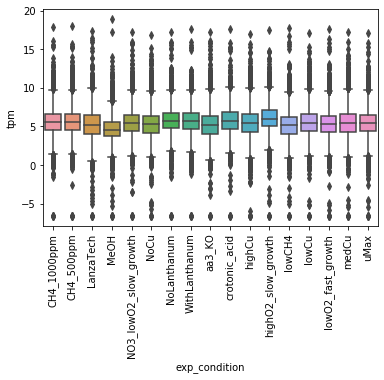

In [26]:
# melt ot make box plot
log_tpm_df_meansT_melt = pd.melt(log_tpm_df_meansT.reset_index(), id_vars=['locus_tag'],var_name="exp_condition",value_name='tpm')
display(log_tpm_df_meansT_melt.head())

# box plot
sns.boxplot(data=log_tpm_df_meansT_melt,x="exp_condition",y="tpm")
#plt.ylim(-1,1000)
plt.xticks(rotation=90)
plt.show()

### normalize the log TPM df to uMax condition by subtracting uMax ave for each gene

In [27]:
# copy the log tpm df
log_norm_uMax = log_tpm_df.copy(deep=True)
# for each sample, subtract the uMax mean value from the log value (log2 ratio (sample_val/umax_val))
for s in samples:
    log_norm_uMax[s] = log_norm_uMax[s].values - log_tpm_df_meansT['uMax'].values

log_norm_uMax

,locus_tag,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,5GB1_FM14_TR1_tpm,...,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm,5GB1C_CH4_500ppm-Rep1_tpm,5GB1C_CH4_500ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep1_tpm,5GB1C_CH4_1000ppm-Rep2_tpm
0,EQU24_RS00005,-0.601044,0.047941,-1.049614,-0.502454,-0.649416,-0.641155,-0.645506,-0.595231,-0.253629,...,-0.154942,-0.432784,-0.493871,-0.223650,-0.558950,-0.280948,0.399464,0.373487,-0.284211,0.121865
1,EQU24_RS00010,-0.733380,-0.080914,-0.721494,-0.506424,-0.900744,-0.834632,-0.952361,-0.934059,-0.209876,...,-0.135052,-0.109768,-0.507752,-0.148888,-0.465297,-0.124955,-0.597569,-0.565058,-0.721821,-0.504324
2,EQU24_RS00015,-0.516520,-0.140261,-0.683805,-0.216384,-0.810810,-0.900097,-0.813251,-0.780671,-0.373117,...,-0.398019,-0.424310,-0.697607,-0.365188,-0.587363,-0.136621,-0.092184,-0.258713,-0.736253,-0.397627
3,EQU24_RS00020,-0.649819,0.075143,-0.458800,-0.283088,-0.723023,-0.737316,-0.699194,-0.764430,-0.299210,...,-0.033110,0.067333,-0.151694,0.100365,-0.081217,-0.004456,-0.288024,-0.198564,-0.117120,0.071733
4,EQU24_RS00035,-1.256002,-0.200434,-0.556848,-0.335072,0.071070,0.096697,0.256685,0.297170,0.156125,...,0.769285,0.607397,0.550830,0.745583,0.602460,0.897642,0.317582,0.251670,0.437081,0.769975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,EQU24_RS23155,-1.182842,-0.681158,-0.856980,-0.542305,-0.361015,-0.401089,-0.303411,-0.365394,-0.109966,...,1.117514,1.343704,0.392860,0.812194,1.093886,1.281384,-0.113170,-0.048651,0.175033,0.206257
4185,EQU24_RS23160,-1.071488,-0.408048,-0.586230,-0.212027,-0.274943,-0.337284,-0.216192,-0.248440,0.144504,...,0.371409,0.597106,-0.570950,-0.062221,0.359933,0.216956,-0.276585,-0.205287,0.090771,0.175775
4186,EQU24_RS23165,-1.215895,-0.674851,-0.775278,-0.497317,-0.351439,-0.382574,-0.295277,-0.331968,-0.105336,...,1.040285,1.225805,0.320341,0.721388,0.979377,1.170250,-0.490622,-0.459552,-0.224727,-0.178535
4187,EQU24_RS23170,-1.173202,-0.479158,-0.660534,-0.686634,-0.831201,-0.793429,-0.803366,-0.801494,-0.614863,...,-0.422156,-0.007818,-1.074077,-0.649950,-0.435328,-0.237397,-0.595719,-0.955076,-0.862541,-0.748100


,locus_tag,exp_condition,tpm,cond
0,EQU24_RS00005,5GB1_FM03_TR1_QC_tpm,-0.601044,uMax
1,EQU24_RS00010,5GB1_FM03_TR1_QC_tpm,-0.733380,uMax
2,EQU24_RS00015,5GB1_FM03_TR1_QC_tpm,-0.516520,uMax
3,EQU24_RS00020,5GB1_FM03_TR1_QC_tpm,-0.649819,uMax
4,EQU24_RS00035,5GB1_FM03_TR1_QC_tpm,-1.256002,uMax


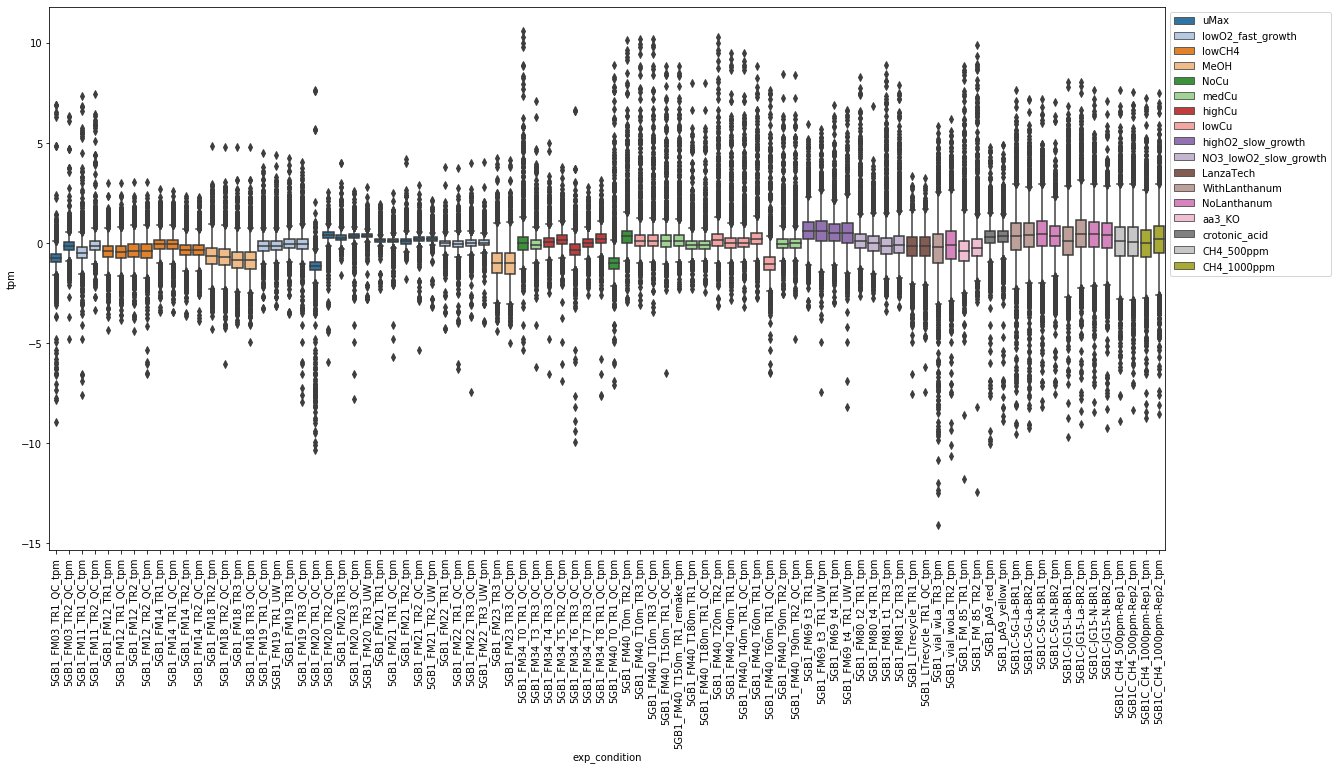

In [28]:
# check a quick boxplot of log normed tpm data
log_norm_uMax_melt = pd.melt(log_norm_uMax[["locus_tag"]+samples], id_vars=['locus_tag'],var_name="exp_condition",value_name='tpm')
log_norm_uMax_melt['cond'] = log_norm_uMax_melt['exp_condition'].apply(lambda x: sample2cond[x])
display(log_norm_uMax_melt.head())

fig = plt.figure(figsize=(20,10))
sns.boxplot(data=log_norm_uMax_melt,x="exp_condition",y="tpm",hue='cond',dodge=False,palette='tab20')
#plt.ylim(-1,1000)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

,locus_tag,exp_condition,tpm,cond
0,EQU24_RS00005,5GB1_FM03_TR1_QC_tpm,-0.601044,uMax
1,EQU24_RS00010,5GB1_FM03_TR1_QC_tpm,-0.733380,uMax
2,EQU24_RS00015,5GB1_FM03_TR1_QC_tpm,-0.516520,uMax
3,EQU24_RS00020,5GB1_FM03_TR1_QC_tpm,-0.649819,uMax
4,EQU24_RS00035,5GB1_FM03_TR1_QC_tpm,-1.256002,uMax


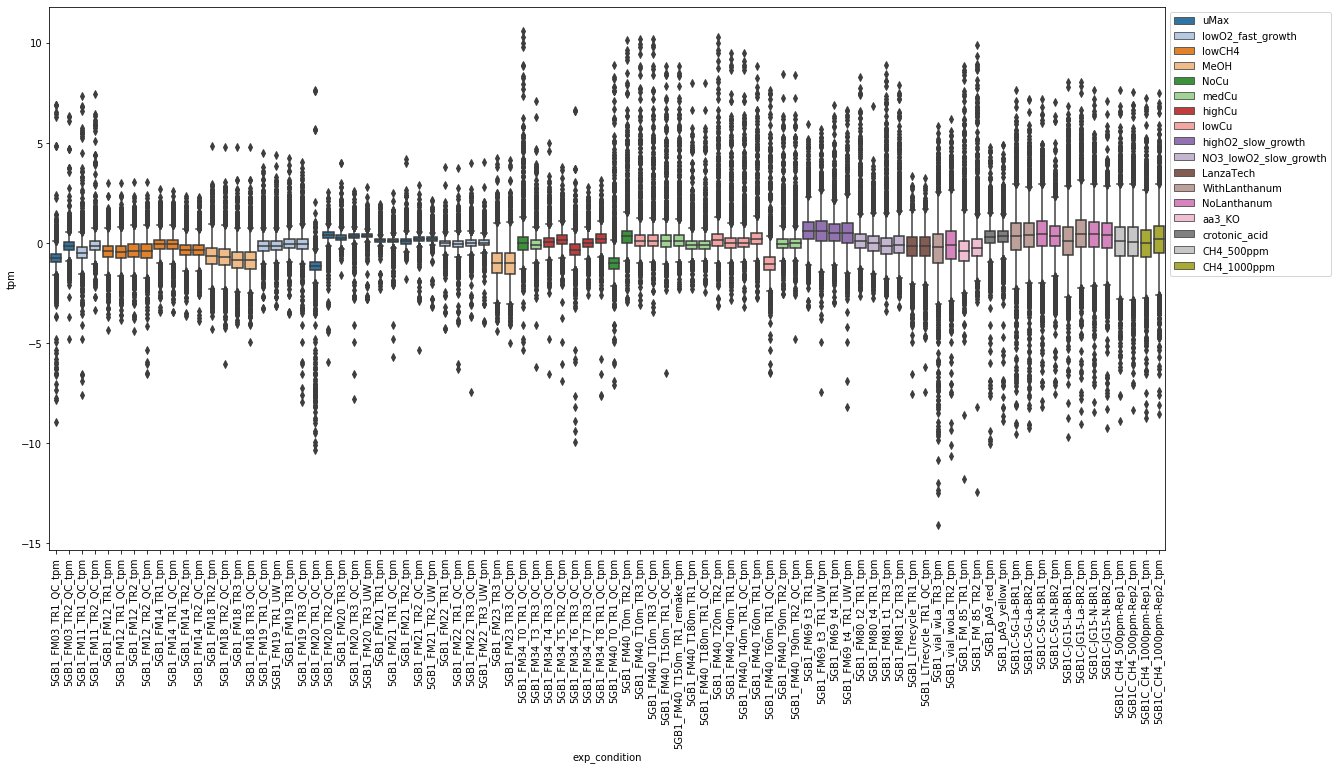

In [29]:
# check a quick boxplot of log normed tpm data
log_norm_uMax_melt = pd.melt(log_norm_uMax[["locus_tag"]+samples], id_vars=['locus_tag'],var_name="exp_condition",value_name='tpm')
log_norm_uMax_melt['cond'] = log_norm_uMax_melt['exp_condition'].apply(lambda x: sample2cond[x])
display(log_norm_uMax_melt.head())

fig = plt.figure(figsize=(20,10))
sns.boxplot(data=log_norm_uMax_melt,x="exp_condition",y="tpm",hue='cond',dodge=False,palette='tab20')
#plt.ylim(-1,1000)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [30]:
# save the log normalized to uMax data
log_norm_uMax.to_csv('data/log_norm_uMax_indiv_lowExAdj_20221031.csv',index=False)

locus_tag,exp_condition,EQU24_RS00005,EQU24_RS00010,EQU24_RS00015,EQU24_RS00020,EQU24_RS00035,EQU24_RS00040,EQU24_RS00045,EQU24_RS00050,EQU24_RS00055,...,EQU24_RS23130,EQU24_RS23135,EQU24_RS23140,EQU24_RS23145,EQU24_RS23150,EQU24_RS23155,EQU24_RS23160,EQU24_RS23165,EQU24_RS23170,EQU24_RS23175
0,CH4_1000ppm,-0.081173,-0.613072,-0.566940,-0.022693,0.603528,-0.712431,-0.390971,0.114900,-0.249826,...,0.140017,0.214336,0.127099,0.205789,0.116345,0.190645,0.133273,-0.201631,-0.805321,-3.243802
1,CH4_500ppm,0.386476,-0.581313,-0.175448,-0.243294,0.284626,-0.838935,-0.626524,-0.123218,-0.604973,...,-0.237296,-0.056326,-0.244960,-0.058735,-0.263310,-0.080911,-0.240936,-0.475087,-0.775397,-2.699553
2,LanzaTech,-0.800015,0.113484,-1.305931,0.334602,-1.037139,0.483219,0.614264,0.770155,0.659934,...,0.489743,0.180446,0.462090,0.179190,0.465183,0.185907,0.481253,0.200760,-0.255911,-0.334095
3,MeOH,-0.891554,-1.403253,-0.670592,-1.748612,-0.664624,-0.938723,-1.121010,-0.723479,-0.736535,...,-1.464542,-2.099029,-1.472358,-2.094369,-1.475978,-2.101176,-1.470884,-2.079524,-0.365976,0.166125
4,NO3_lowO2_slow_growth,-0.506346,-0.264002,-0.481043,0.004020,-0.344508,-0.152323,-0.063933,-0.149231,-0.105544,...,0.834904,0.912442,0.830948,0.915096,0.815129,0.904467,0.830653,0.896752,-0.805428,-0.859108


exp_condition,CH4_1000ppm,CH4_500ppm,LanzaTech,MeOH,NO3_lowO2_slow_growth,NoCu,NoLanthanum,WithLanthanum,aa3_KO,crotonic_acid,highCu,highO2_slow_growth,lowCH4,lowCu,lowO2_fast_growth,medCu,uMax
locus_tag,,,,,,,,,,,,,,,,,
EQU24_RS00005,-0.081173,0.386476,-0.800015,-0.891554,-0.506346,-0.439653,-0.493095,-0.434729,-0.759646,-0.223989,-0.033141,0.520593,-0.538919,-0.207467,-0.332631,-0.034993,-3.700743e-16
EQU24_RS00010,-0.613072,-0.581313,0.113484,-1.403253,-0.264002,-0.209007,-0.296572,-0.402136,-0.198740,0.013783,0.484292,0.932400,-0.640676,0.117203,-0.261372,0.296422,0.000000e+00
EQU24_RS00015,-0.566940,-0.175448,-1.305931,-0.670592,-0.481043,-0.469300,-0.391250,-0.607336,-1.350340,0.162056,0.064755,0.611001,-0.668262,-0.158597,-0.124239,-0.030986,-4.440892e-16
EQU24_RS00020,-0.022693,-0.243294,0.334602,-1.748612,0.004020,-0.522309,-0.165983,-0.216051,-0.151583,0.332666,0.131899,0.377040,-0.518558,-0.128568,-0.340971,0.057637,-1.480297e-16
EQU24_RS00035,0.603528,0.284626,-1.037139,-0.664624,-0.344508,-0.278806,0.300372,0.406444,-0.565277,-0.075529,0.226887,0.434658,0.040282,-0.093765,0.010949,0.105405,7.401487e-17


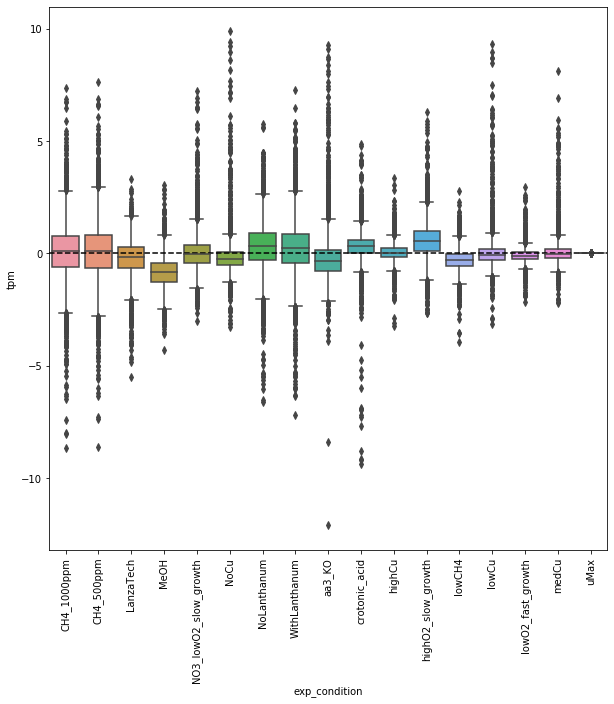

In [31]:
log_norm_uMax_means = u.get_gene_means_by_condition(log_norm_uMax,samples,sample2cond)
display(log_norm_uMax_means.head())

log_norm_uMax_meansT = log_norm_uMax_means.set_index('exp_condition').T
display(log_norm_uMax_meansT.head())

log_norm_uMax_meansT_melt = pd.melt(log_norm_uMax_meansT.reset_index(), id_vars=['locus_tag'],var_name="exp_condition",value_name='tpm')




fig = plt.figure(figsize=(10,10))
sns.boxplot(data=log_norm_uMax_meansT_melt,x="exp_condition",y="tpm")
#plt.ylim(-1,1000)
plt.xticks(rotation=90)
plt.axhline(0,c='k',linestyle='--')
plt.show()

# Actually view normalized TPMs by gene group

In [32]:
# Mary's request to sort by growth rate
priority = {
     "uMax": 1,
     "MeOH": 2,
     "NoCu": 3,
     "lowCu": 4,
     "medCu": 5,
     "highCu": 6,
     "LanzaTech": 7,
     "lowCH4": 8,
     "lowO2_fast_growth": 9,
     "aa3_KO": 10,
     "NO3_lowO2_slow_growth": 11,
     "highO2_slow_growth": 12,
     "CH4_500ppm":13,
     "CH4_1000ppm":14,
     "WithLanthanum": 15,
     "NoLanthanum": 16,
     "crotonic_acid": 17,
}

exp_order = [
     "uMax",
     "MeOH",
     "NoCu",
     "lowCu",
     "medCu",
     "highCu",
     "LanzaTech",
     "lowCH4",
     "lowO2_fast_growth",
     "aa3_KO",
     "NO3_lowO2_slow_growth",
     "highO2_slow_growth",
     "CH4_500ppm",
     "CH4_1000ppm",
     "WithLanthanum",
     "NoLanthanum",
     "crotonic_acid",
]

In [33]:
# make a bar chart for a gene activity
df = log_norm_uMax.set_index('locus_tag').T.reset_index().rename(columns={'index':'sample'})
df['exp_condition'] = df['sample'].apply(lambda x: sample2cond[x])
df['exp_order'] = df['exp_condition'].apply(lambda x: priority[x])

df

locus_tag,sample,EQU24_RS00005,EQU24_RS00010,EQU24_RS00015,EQU24_RS00020,EQU24_RS00035,EQU24_RS00040,EQU24_RS00045,EQU24_RS00050,EQU24_RS00055,...,EQU24_RS23140,EQU24_RS23145,EQU24_RS23150,EQU24_RS23155,EQU24_RS23160,EQU24_RS23165,EQU24_RS23170,EQU24_RS23175,exp_condition,exp_order
0,5GB1_FM03_TR1_QC_tpm,-0.601044,-0.733380,-0.516520,-0.649819,-1.256002,-0.557333,-0.216755,-0.481266,-0.167167,...,-1.024546,-1.266505,-0.964596,-1.182842,-1.071488,-1.215895,-1.173202,-1.188843,uMax,1
1,5GB1_FM03_TR2_QC_tpm,0.047941,-0.080914,-0.140261,0.075143,-0.200434,-0.077496,0.163021,-0.036885,-0.493976,...,-0.427060,-0.710534,-0.456171,-0.681158,-0.408048,-0.674851,-0.479158,-0.517788,uMax,1
2,5GB1_FM11_TR1_QC_tpm,-1.049614,-0.721494,-0.683805,-0.458800,-0.556848,-1.187402,-1.156092,-0.524245,-0.442488,...,-0.615735,-0.824296,-0.652643,-0.856980,-0.586230,-0.775278,-0.660534,0.394865,lowO2_fast_growth,9
3,5GB1_FM11_TR2_QC_tpm,-0.502454,-0.506424,-0.216384,-0.283088,-0.335072,-0.289866,-0.519137,-0.222013,-0.498583,...,-0.209264,-0.511975,-0.238079,-0.542305,-0.212027,-0.497317,-0.686634,0.076057,lowO2_fast_growth,9
4,5GB1_FM12_TR1_tpm,-0.649416,-0.900744,-0.810810,-0.723023,0.071070,-0.035000,-0.446598,-0.370131,-0.002611,...,-0.273341,-0.353450,-0.288136,-0.361015,-0.274943,-0.351439,-0.831201,-0.763535,lowCH4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,5GB1C-JG15-N-BR2_tpm,-0.280948,-0.124955,-0.136621,-0.004456,0.897642,0.801453,0.170924,0.094229,0.481262,...,0.216102,1.306288,0.223497,1.281384,0.216956,1.170250,-0.237397,-2.353067,NoLanthanum,16
82,5GB1C_CH4_500ppm-Rep1_tpm,0.399464,-0.597569,-0.092184,-0.288024,0.317582,-0.831272,-0.625782,-0.186804,-0.431571,...,-0.277920,-0.090994,-0.294946,-0.113170,-0.276585,-0.490622,-0.595719,-2.595061,CH4_500ppm,13
83,5GB1C_CH4_500ppm-Rep2_tpm,0.373487,-0.565058,-0.258713,-0.198564,0.251670,-0.846597,-0.627267,-0.059631,-0.778374,...,-0.212000,-0.026477,-0.231675,-0.048651,-0.205287,-0.459552,-0.955076,-2.804045,CH4_500ppm,13
84,5GB1C_CH4_1000ppm-Rep1_tpm,-0.284211,-0.721821,-0.736253,-0.117120,0.437081,-0.765114,-0.425505,0.049969,-0.319712,...,0.083911,0.188452,0.072601,0.175033,0.090771,-0.224727,-0.862541,-3.523849,CH4_1000ppm,14


In [34]:
log_norm_uMax_means['exp_order'] = log_norm_uMax_means['exp_condition'].apply(lambda x: priority[x])
log_norm_uMax_means

locus_tag,exp_condition,EQU24_RS00005,EQU24_RS00010,EQU24_RS00015,EQU24_RS00020,EQU24_RS00035,EQU24_RS00040,EQU24_RS00045,EQU24_RS00050,EQU24_RS00055,...,EQU24_RS23135,EQU24_RS23140,EQU24_RS23145,EQU24_RS23150,EQU24_RS23155,EQU24_RS23160,EQU24_RS23165,EQU24_RS23170,EQU24_RS23175,exp_order
0,CH4_1000ppm,-8.117298e-02,-0.613072,-5.669396e-01,-2.269307e-02,6.035278e-01,-7.124312e-01,-3.909706e-01,1.149000e-01,-2.498263e-01,...,2.143358e-01,1.270989e-01,2.057890e-01,1.163454e-01,1.906451e-01,1.332729e-01,-2.016311e-01,-8.053208e-01,-3.243802e+00,14
1,CH4_500ppm,3.864757e-01,-0.581313,-1.754483e-01,-2.432939e-01,2.846261e-01,-8.389345e-01,-6.265244e-01,-1.232175e-01,-6.049726e-01,...,-5.632588e-02,-2.449597e-01,-5.873515e-02,-2.633104e-01,-8.091053e-02,-2.409356e-01,-4.750868e-01,-7.753973e-01,-2.699553e+00,13
2,LanzaTech,-8.000146e-01,0.113484,-1.305931e+00,3.346018e-01,-1.037139e+00,4.832193e-01,6.142637e-01,7.701552e-01,6.599340e-01,...,1.804464e-01,4.620897e-01,1.791900e-01,4.651827e-01,1.859070e-01,4.812533e-01,2.007601e-01,-2.559111e-01,-3.340955e-01,7
3,MeOH,-8.915541e-01,-1.403253,-6.705917e-01,-1.748612e+00,-6.646240e-01,-9.387229e-01,-1.121010e+00,-7.234791e-01,-7.365353e-01,...,-2.099029e+00,-1.472358e+00,-2.094369e+00,-1.475978e+00,-2.101176e+00,-1.470884e+00,-2.079524e+00,-3.659764e-01,1.661249e-01,2
4,NO3_lowO2_slow_growth,-5.063457e-01,-0.264002,-4.810428e-01,4.020358e-03,-3.445083e-01,-1.523231e-01,-6.393280e-02,-1.492311e-01,-1.055436e-01,...,9.124425e-01,8.309478e-01,9.150956e-01,8.151287e-01,9.044667e-01,8.306533e-01,8.967525e-01,-8.054283e-01,-8.591081e-01,11
5,NoCu,-4.396529e-01,-0.209007,-4.692995e-01,-5.223090e-01,-2.788055e-01,7.043413e-01,8.453355e-01,4.215533e-01,5.551800e-01,...,-5.925837e-01,-4.966195e-01,-6.100133e-01,-5.126789e-01,-6.012962e-01,-5.047228e-01,-5.955785e-01,-6.681774e-01,-1.099944e-01,3
6,NoLanthanum,-4.930955e-01,-0.296572,-3.912499e-01,-1.659828e-01,3.003718e-01,6.253483e-01,2.895031e-01,1.208882e-01,5.183104e-01,...,9.631078e-01,3.619424e-01,9.631511e-01,3.519119e-01,9.569764e-01,3.711382e-01,8.663079e-01,-4.638109e-01,-2.716110e+00,16
7,WithLanthanum,-4.347292e-01,-0.402136,-6.073361e-01,-2.160511e-01,4.064436e-01,4.943045e-01,1.709418e-01,6.709564e-02,3.592410e-01,...,3.977151e-01,-2.667932e-01,3.749088e-01,-2.725897e-01,3.542166e-01,-2.579611e-01,3.151877e-01,-7.868791e-01,-1.929767e+00,15
8,aa3_KO,-7.596458e-01,-0.198740,-1.350340e+00,-1.515829e-01,-5.652774e-01,1.981753e-01,6.689269e-01,2.941344e-01,3.255052e-01,...,1.044067e+00,7.558055e-01,1.043967e+00,7.305813e-01,1.047063e+00,7.544730e-01,1.001053e+00,-1.389402e+00,-1.483936e+00,10
9,crotonic_acid,-2.239888e-01,0.013783,1.620560e-01,3.326662e-01,-7.552875e-02,7.679064e-01,1.206983e+00,1.181648e+00,1.271380e+00,...,2.510206e-01,1.363360e-01,2.520090e-01,1.249810e-01,2.428353e-01,1.296052e-01,2.590461e-01,2.825083e-01,1.649294e-01,17


In [35]:
color_dict = {
    'uMax':'#d9d9d9', #gray
    'NoCu':'#bdd7e7', #blues
    'lowCu':'#6baed6', #blues
    'medCu':'#3182bd', #blues
    'highCu':'#08519c', #blues
    'lowCH4':'#b3de69', #green
    'WithLanthanum':'#e6550d', #orange
    'NoLanthanum':'#fdbe85', #orange
    'MeOH':'#fb8072', #red
    'highO2_slow_growth':'#6a3d9a',
    'NO3_lowO2_slow_growth':'#bc80bd', #purple
    'lowO2_fast_growth':'#fccde5', #pink
    'LanzaTech':'#33a02c', #green
    'aa3_KO':'#e6f598', #light green
    'crotonic_acid':'#fee08b', #yellow
    'CH4_500ppm':'#99d8c9', #teal
    'CH4_1000ppm':'#66c2a4', #darker teal
}
color_domain = exp_order
color_range = [alt.HexColor(color_dict[x]) for x in exp_order]

In [36]:
def make_bars(df_means,locus,final=False):
    gene_note = loc2gene_note[locus]
    y_ax_title = [f'{locus}',f'{gene_note}']
    
    small_df = df_means[['exp_condition','exp_order',locus]]
    bars = alt.Chart(small_df).mark_bar().encode(
        x=alt.X(
            'exp_condition:N',
            sort=alt.EncodingSortField(field="exp_order", order='ascending'),
            axis=alt.Axis(
                title='',
                labels=True if final else False,
            )
        ),
        y=alt.Y(
            f"{locus}:Q",
            axis=alt.Axis(title=y_ax_title)
        ),
        color = alt.Color('exp_condition',
                           scale=alt.Scale(
                               domain=color_domain,
                               range=color_range
                               )
                         ),
        tooltip=['exp_condition'],
    ).properties(
        width=600,
        height=100
    )
    
    return bars

def make_dots(df, locus):
    small_df = df[['sample','exp_condition','exp_order',locus]]
    dots = alt.Chart(df).mark_circle(color='black').encode(
        x=alt.X(
            'exp_condition:N',
            sort=alt.EncodingSortField(field="exp_order", order='ascending'),
            axis=alt.Axis(title='',labels=False)
        ),
        y=alt.Y(
            f"{locus}:Q",
            #axis=alt.Axis(title=[f'{locus}'])
        ),tooltip = ['exp_condition:N','sample:N']

    ).properties(
        width=600,
        height=100
    )
    
    return dots

def make_gene_activity(df, df_means, locus,final=False):
    b = make_bars(df_means, locus,final=final)
    d = make_dots(df,locus)
    
    c = (b+d).resolve_scale(x='independent')

    return c

In [37]:
def create_stacked_activities_chart(log_df, log_df_means,loci,cmetab_group):
    final = False
    chart_list = []
    for i,locus in enumerate(loci):
        print("making chart for", locus)
        if i==len(loci)-1:
            final = True
            print("Final!")
        new_c = make_gene_activity(log_df, log_df_means, locus, final=final)
        chart_list.append(new_c)
        
    chart = alt.vconcat(*chart_list).resolve_scale(
        x='shared',
        #y='shared'
    ).properties(
        title=cmetab_group
    ).configure_title(
        fontSize=40,
        font='Courier',
    )
    chart.save(f"alt_out/{cmetab_group}.html")
    
    #return chart
    

In [39]:
cm_group = 'CH3OH_Ox'
loci = cm_df[cm_df['cmetab']==cm_group]['locus_tag'].values[:5]
create_stacked_activities_chart(df, log_norm_uMax_means, loci,cm_group)

making chart for EQU24_RS18155
making chart for EQU24_RS18145
making chart for EQU24_RS18150
making chart for EQU24_RS18155
making chart for EQU24_RS18160
Final!


In [38]:
# make stacked chart for each gruop of central metabolism
#for cm_group in cm_df['cmetab'].unique():
for cm_group in ['Glycolysis','TCA_cycle']:
    print(f"__{cm_group}__")
    loci = cm_df[cm_df['cmetab']==cm_group]['locus_tag'].values
    create_stacked_activities_chart(df, log_norm_uMax_means, loci,cm_group)

__Glycolysis__
making chart for EQU24_RS15285
making chart for EQU24_RS20710
making chart for EQU24_RS21560
making chart for EQU24_RS09515
making chart for EQU24_RS13315
making chart for EQU24_RS15280
making chart for EQU24_RS21635
making chart for EQU24_RS21640
making chart for EQU24_RS18895
making chart for EQU24_RS09840
making chart for EQU24_RS03055
making chart for EQU24_RS03480
making chart for EQU24_RS06435
making chart for EQU24_RS00585
making chart for EQU24_RS06090
making chart for EQU24_RS06095
making chart for EQU24_RS04150
Final!
__TCA_cycle__
making chart for EQU24_RS08320
making chart for EQU24_RS08335
making chart for EQU24_RS21340
making chart for EQU24_RS04215
making chart for EQU24_RS04220
making chart for EQU24_RS11680
making chart for EQU24_RS21775
making chart for EQU24_RS06010
making chart for EQU24_RS06015
making chart for EQU24_RS11660
making chart for EQU24_RS11665
making chart for EQU24_RS11670
making chart for EQU24_RS06965
making chart for EQU24_RS06970
mak

In [129]:
# can I do a repeat chart? 

In [137]:
def make_bars_rep(df_means,loci):
    bars = alt.Chart(df_means).mark_bar().encode(
        x=alt.X(
            'exp_condition:N',
            sort=alt.EncodingSortField(field="exp_order", order='ascending'),
            axis=alt.Axis(title='condition')
        ),
        y=alt.Y(
            alt.repeat('row'),
            type='quantitative'
        ),
        color = alt.Color('exp_condition',
                           scale=alt.Scale(
                               domain=color_domain,
                               range=color_range
                               )
                         )
    ).properties(
        width=600,
        height=100
    ).repeat(
        row=loci
    )
    
    return bars

def make_dots_rep(df, loci):
    dots = alt.Chart(df).mark_circle(color='black').encode(
        x=alt.X(
            'exp_condition:N',
            sort=alt.EncodingSortField(field="exp_order", order='ascending'),
            axis=alt.Axis(title='',labels=False)
        ),
        y=alt.Y(
            alt.repeat('row'),
            type='quantitative'
        ),tooltip = ['sample:N']

    ).properties(
        width=600,
        height=100
    ).repeat(
        row=loci
    )
    
    return dots

In [139]:
loci = list(ch4ox['locus_tag'].values)
br = make_bars_rep(log_norm_uMax_means,loci)
dr = make_dots_rep(df,loci)

In [140]:
br+dr

ValueError: Repeat charts cannot be layered.

In [133]:
list(ch4ox['locus_tag'].values[:2])

['EQU24_RS19315', 'EQU24_RS19310']